# Regression
CMP5101 notes (Tevfik Aytekin)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

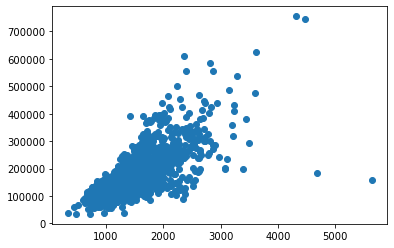

In [42]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

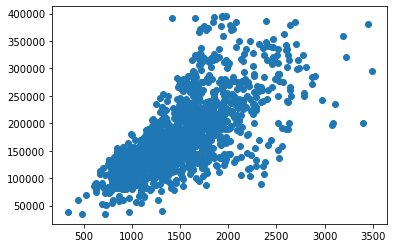

In [80]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


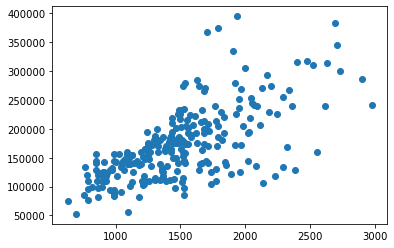

In [81]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [82]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

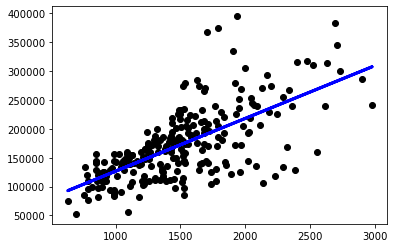

In [83]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [84]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

35133.41167506011
[91.47618004]


In [85]:
def predict(GrLivArea):
    return model.intercept_ + model.coef_*GrLivArea

In [86]:
predict(1000)

array([126609.59171238])

#### Can we interpret the above coefficient as increase in price per square feet?

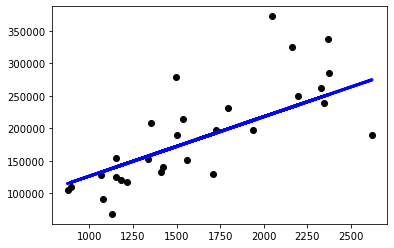

In [87]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [88]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 33420.89246568707
33420.89246568709
Test MAE: 38348.69815256631


In [89]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 21.40171847791254


In [90]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.5453259315952956


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [91]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 64868.583255065074
Baseline (mean) MAPE: 36.83244105383452


In [92]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.2638154852439003
Baseline (mean) Kaggle-score: 0.4150930103045363


In [93]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [94]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 35710.91311546194
Test Kaggle-Score: 0.26907794559207443
Test MAPE: 22.35799138553843
Intercept: 65127.48319073468
[['GrLivArea' '124.86026924344598']
 ['Bedroom' '-25791.6917195041']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

In [95]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 58087.33519338093
Test Kaggle-Score: 0.4077738062012719
Test MAPE: 35.887318305019335
Intercept: 138967.61079496754
[['Bedroom' '14537.19708786125']]


In [98]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 22915.697651597235
Test Kaggle-Score: 0.22593465452012473
Test MAPE: 13.006304616795184
Intercept: -1176714.3683906752
[['OverallQual' '19256.21563617924']
 ['GrLivArea' '55.963082976436255']
 ['GarageCars' '9876.494060829005']
 ['GarageArea' '12.122826638301138']
 ['TotalBsmtSF' '20.455452104052426']
 ['1stFlrSF' '15.816879148837323']
 ['FullBath' '-6753.7971302945125']
 ['TotRmsAbvGrd' '-944.8790772245468']
 ['YearBuilt' '280.9888311679117']
 ['YearRemodAdd' '279.4948088877142']]


In [99]:
X.shape

(1460, 10)

In [100]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 19188.708117788985
Test Kaggle-Score: 0.17194417033580767
Test MAPE: 11.519682866361482
Intercept: 146987.31222253354
[['MSSubClass' -29.239118011156897]
 ['LotFrontage' 38.41765973843042]
 ['LotArea' 0.7697305986189953]
 ['OverallQual' 6936.689706988656]
 ['OverallCond' 5154.20342526536]
 ['YearBuilt' 303.43537822112165]
 ['YearRemodAdd' 150.17844445016902]
 ['MasVnrArea' 21.27211365186318]
 ['BsmtFinSF1' 14.222116737984749]
 ['BsmtFinSF2' 8.284599496274723]
 ['BsmtUnfSF' -2.4519688993786986]
 ['TotalBsmtSF' 20.054763226651176]
 ['1stFlrSF' 10.007085922110491]
 ['2ndFlrSF' 28.33843093081441]
 ['LowQualFinSF' -3.583409833558264]
 ['GrLivArea' 34.762084693282304]
 ['BsmtFullBath' 1128.1188402475711]
 ['BsmtHalfBath' 1001.9255149723646]
 ['FullBath' 2955.4086482343396]
 ['HalfBath' -67.6396041133029]
 ['BedroomAbvGr' -4556.832801999632]
 ['KitchenAbvGr' -11622.12448196589]
 ['TotRmsAbvGrd' 2079.5076327487395]
 ['Fireplaces' 5593.161288620482]
 ['GarageYrBlt' -85.78479854725146]

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [ ]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [ ]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

In [ ]:
print(scaler.transform(df))

#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

### Example

In [ ]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

### Overfitting

In [ ]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [ ]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



In [ ]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

In [ ]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

### Batch Gradient Descent Implementation

In [ ]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [ ]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [ ]:
import copy

n_features = 2
learning_rate = 0.3
n_iter=200
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

In [ ]:
plt.plot(cost_array)

In [ ]:
plt.plot(cost_array[:10])